In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/combined_data.csv', encoding = 'latin-1')

In [ ]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [ ]:
df['label'].value_counts()


,count
label,
1,43910
0,39538


In [ ]:
df.isna().sum()


,0
label,0
text,0
len_text,0
clean_text,0


<function matplotlib.pyplot.show(close=None, block=None)>

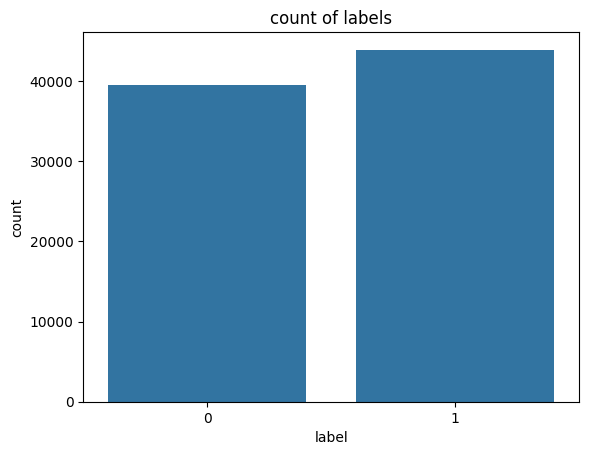

In [ ]:
sns.countplot(x= "label", data = df)
plt.title("count of labels")
plt.show

In [ ]:
def len_info(text):
    l=text.split()
    l=len(l)
    return l

In [ ]:
df['len_text'] = df['text'].apply(len_info)


In [ ]:
df.text[0]


'ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage'

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
ps=PorterStemmer()
sw=stopwords.words('english')

In [ ]:
def preprocessing(text):
    c_text=text.split()
    c_text=[ps.stem(word) for word in c_text if word not in sw ]
    c_text=' '.join(c_text)
    return c_text

In [ ]:
df['clean_text']=df['text'].apply(preprocessing)
df.head()

,label,text,len_text,clean_text
0,1,ounce feather bowl hummingbird opec moment ala...,20,ounc feather bowl hummingbird opec moment alab...
1,1,wulvob get your medircations online qnb ikud v...,103,wulvob get medirc onlin qnb ikud viagra escape...
2,0,computer connection from cnn com wednesday es...,337,comput connect cnn com wednesday escapenumb ma...
3,1,university degree obtain a prosperous future m...,76,univers degre obtain prosper futur money earn ...
4,0,thanks for all your answers guys i know i shou...,222,thank answer guy know check rsync manual would...


In [ ]:
voc_size=1000
model=Sequential()
model.add(Embedding(voc_size,40,input_length=1000))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(df['clean_text'].values)

In [ ]:
sequences = tokenizer.texts_to_sequences(df['clean_text'].values)
maxlen = 80
x = pad_sequences(sequences,padding='post',maxlen=maxlen)
y=df['label']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print('Train text shape: ',x_train.shape)
print('Train label shape: ',y_train.shape)

Train text shape:  (66758, 80)
Train label shape:  (66758,)


In [ ]:
op=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=42,epochs=3)

Epoch 1/3
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 164s 102ms/step - accuracy: 0.9683 - loss: 0.0920 - val_accuracy: 0.9751 - val_loss: 0.0691
Epoch 2/3
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 201s 102ms/step - accuracy: 0.9819 - loss: 0.0518 - val_accuracy: 0.9765 - val_loss: 0.0673
Epoch 3/3
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 201s 101ms/step - accuracy: 0.9831 - loss: 0.0492 - val_accuracy: 0.9747 - val_loss: 0.0735


In [ ]:
user=['hi daren ,\nbryan hull gave me your name . a customer was interested in trading intrastate gas and bryan had informed me that our exxon - katy location is intrastate . i was wondering if you would be interested in changing the long description on eol for this location to include the phrase intrastate gas so that any customers that are interested would be able to see that . if this is okay with you , i will forward it on to our product development team .\nthanks .\nkara\nkara boudreau lauer\nenrononline marketing\n713 / 853 - 0570\nkara . lauer @ enron . com'
]
test_sequences = tokenizer.texts_to_sequences(user)
a=pad_sequences(test_sequences,padding='post',maxlen=100)

res=model.predict(a)

if res>0.5:
    print(f'spam:{res}')

else:
    print(f'not a spam:{res}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
not a spam:[[0.00100457]]
